In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
results_csv = '../../results/results.csv'
df = pd.read_csv(results_csv)
df = df[df['pkg_energy'] >= 0]


all_flags = df['flag'].unique()
flags = np.delete(all_flags, np.argwhere(all_flags == '-O0'))
progs = df['program'].unique()

print(f'Flags: {len(flags)}')
print(flags)
print(f'Programs: {len(progs)}')
print(progs)

Flags: 26
['-fcase-merge' '-fcase-folding' '-fcall-arity' '-fexitification'
 '-fcmm-elim-common-blocks' '-fcmm-sink' '-fcpr-anal' '-fcse' '-fstg-cse'
 '-fdmd-tx-dict-sel' '-fdo-eta-reduction' '-fdo-lambda-eta-expansion'
 '-ffloat-in' '-ffull-laziness' '-fignore-asserts' '-fliberate-case'
 '-floopification' '-fllvm-pass-vectors-in-regs' '-fspec-constr'
 '-fspecialise' '-fcross-module-specialise' '-fsolve-constant-dicts'
 '-fstrictness' '-funbox-small-strict-fields' '-fblock-layout-cfg'
 '-fstg-lift-lams']
Programs: 33
['cacheprof' 'constraints' 'hash' 'bernouilli' 'exp3_8' 'gen_regexps'
 'integrate' 'anna' 'real_cacheprof' 'compress2' 'binary-trees' 'fasta'
 'k-nucleotide' 'pidigits' 'callback001' 'callback002' 'chan' 'ansi'
 'atom' 'awards' 'banner' 'gg' 'parser' 'fluid' 'cryptarithm1' 'clausify'
 'life' 'power' 'treejoin' 'queens' 'parfib' 'blackscholes' 'coins']


In [ ]:
plot_col = int(np.ceil(np.sqrt(len(progs))))
fig_shape = (3, 11) # (columns, rows)

def create_subplot(axs, row, col, df, df_col, prog, label):
    ax = axs[row, col]
    sns.boxplot(ax=ax, data=df, y='program', x=df_col, hue='flag')
    # ax.set(ylabel=prog, xlabel=label)
    ax.set(ylabel='', xlabel=label)
    ax.title.set_text(prog)
    ax.yaxis.set_ticks([])
    ax.get_legend().remove()

def format_fig(fig, label, path):
    lines_labels = [fig.axes[0].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    # fig.tight_layout()
    fig.subplots_adjust(hspace=1.2, wspace=0.05)
    fig.legend(lines, labels, loc=8, prop={'size': 12})
    # fig.legend(lines, labels, loc=8, bbox_to_anchor=[0.9, 0.05], prop={'size': 12})
    # fig.suptitle(label, fontsize=16, y=0.055, x=0.4)
    # fig.suptitle(label, fontsize=16, y=0, x=0.4)
    fig.savefig(path)

# for flag in flags:
for flag in flags:
    flag_df = df[(df['flag'] == flag) | (df['flag'] == '-O0')]

    # energy
    e_fig, e_axs = plt.subplots(fig_shape[1], fig_shape[0], figsize=[16,12])
    # execution time
    t_fig, t_axs = plt.subplots(fig_shape[1], fig_shape[0], figsize=[16,12])

    for i, prog in enumerate(progs):
        data = flag_df[flag_df['program'] == prog]
        row = i // fig_shape[0]
        col = i % fig_shape[0]

        e_xlabel, t_xlabel = ('', '')
        if row == fig_shape[1] - 1:
            e_xlabel = 'Energy (J)'
            t_xlabel = 'Execution Time (ms)'

        create_subplot(e_axs, row, col, data, 'pkg_energy', prog, e_xlabel)
        create_subplot(t_axs, row, col, data, 'execution_time', prog, t_xlabel)

    for i in range(len(progs), fig_shape[0] * fig_shape[1]):
        row = i // fig_shape[0]
        col = i % fig_shape[0]
        e_fig.delaxes(e_axs[row][col])
        t_fig.delaxes(t_axs[row][col])

    format_fig(e_fig, f'Energy consumption of programs compiled with {flag}', f'../../results/charts/energy/{flag[1:]}.png')
    format_fig(t_fig, f'Execution time of programs compiled with {flag}', f'../../results/charts/time/{flag[1:]}.png')

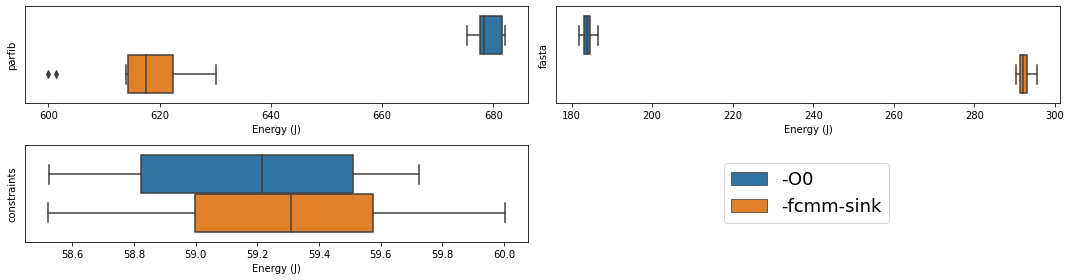

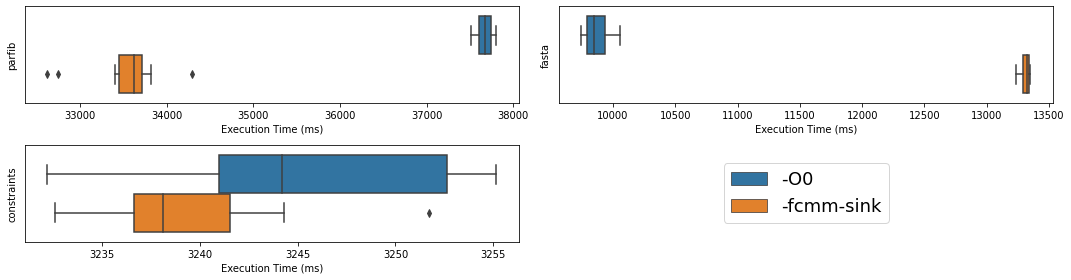

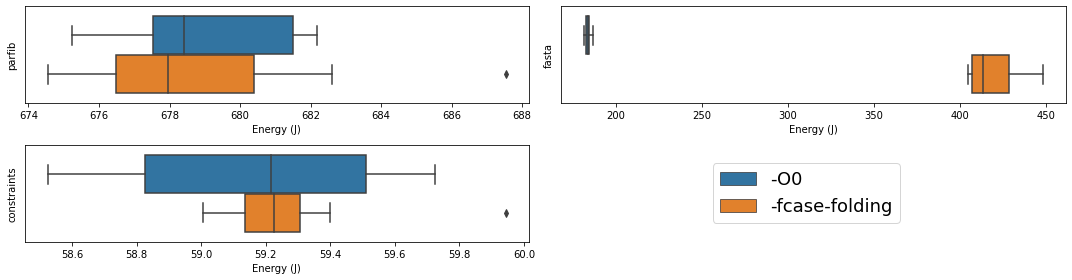

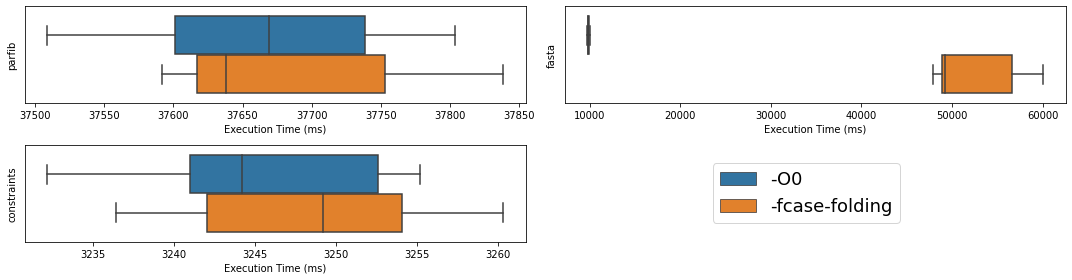

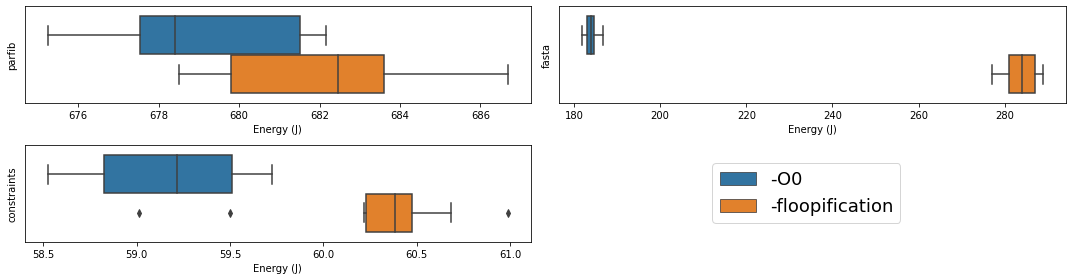

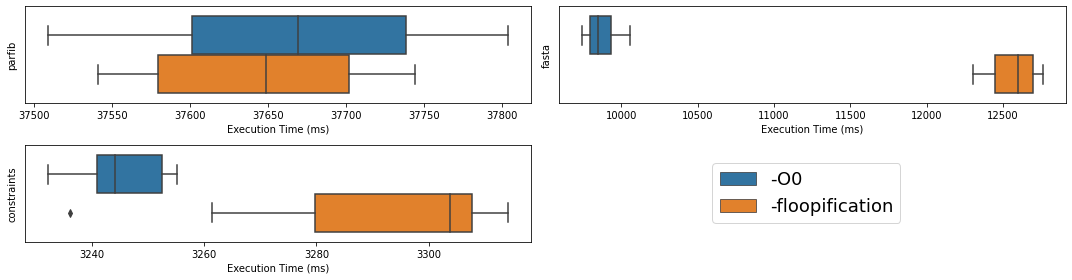

In [6]:
# create custom boxplots
plot_col = int(np.ceil(np.sqrt(len(progs))))

fig_shape = (2, 2)

c_flags = ['-fcmm-sink','-fcase-folding','-floopification']
c_progs = ['parfib', 'fasta', 'constraints']

def create_subplot(axs, row, col, df, df_col, prog, label):
    ax = axs[row, col]
    sns.boxplot(ax=ax, data=df, y='program', x=df_col, hue='flag')
    ax.set(ylabel=prog, xlabel=label)
    ax.yaxis.set_ticks([])
    ax.get_legend().remove()

def format_fig(fig, label, path):
    lines_labels = [fig.axes[0].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.tight_layout()
    fig.legend(lines, labels, loc=8, bbox_to_anchor=[0.75, 0.18], prop={'size': 18})
    # fig.suptitle(label, fontsize=16, y=0.055, x=0.4)
    # fig.suptitle(label, fontsize=16, y=0, x=0.4)
    fig.savefig(path)

for flag in c_flags:
    flag_df = df[(df['flag'] == flag) | (df['flag'] == '-O0')]

    # energy
    e_fig, e_axs = plt.subplots(fig_shape[0], fig_shape[1], figsize=[15,4])
    # execution time
    t_fig, t_axs = plt.subplots(fig_shape[0], fig_shape[1], figsize=[15,4])

    for i, prog in enumerate(c_progs):
        data = flag_df[flag_df['program'] == prog]
        row = i // fig_shape[0]
        col = i % fig_shape[1]

        create_subplot(e_axs, row, col, data, 'pkg_energy', prog, 'Energy (J)')
        create_subplot(t_axs, row, col, data, 'execution_time', prog, 'Execution Time (ms)')

    for i in range(len(c_progs), fig_shape[0] * fig_shape[1]):
        row = i // fig_shape[0]
        col = i % fig_shape[1]
        e_fig.delaxes(e_axs[row][col])
        t_fig.delaxes(t_axs[row][col])

    format_fig(e_fig, f'Energy consumption of programs compiled with {flag}', f'../../results/charts/random/energy-{flag[1:]}.png')
    format_fig(t_fig, f'Execution time of programs compiled with {flag}', f'../../results/charts/random/time-{flag[1:]}.png')

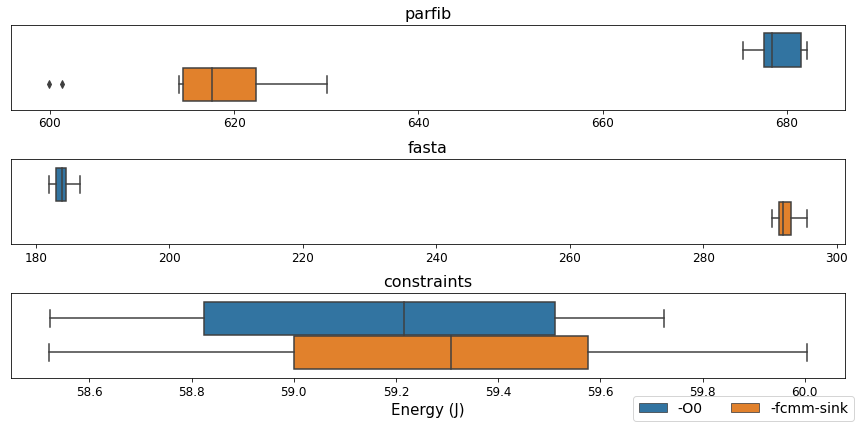

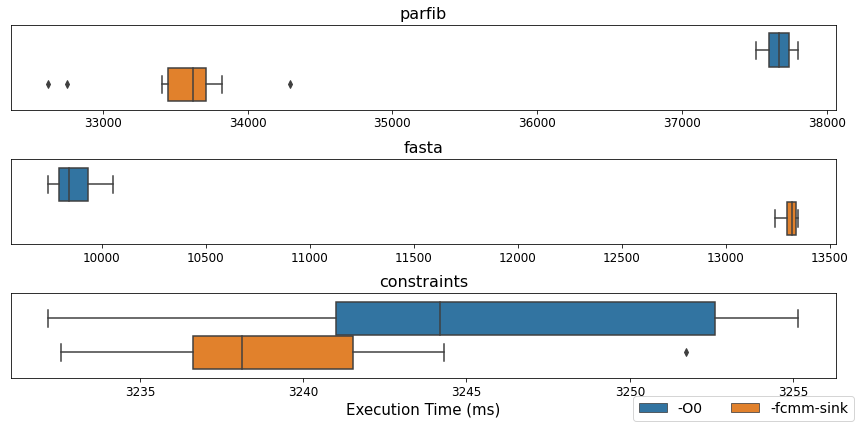

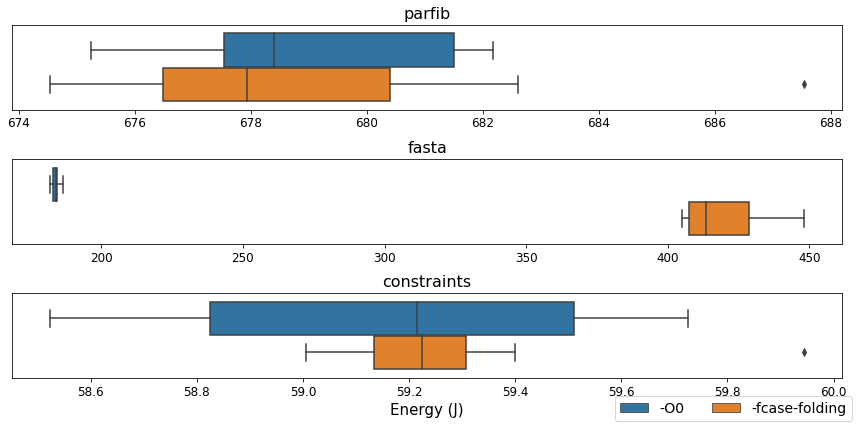

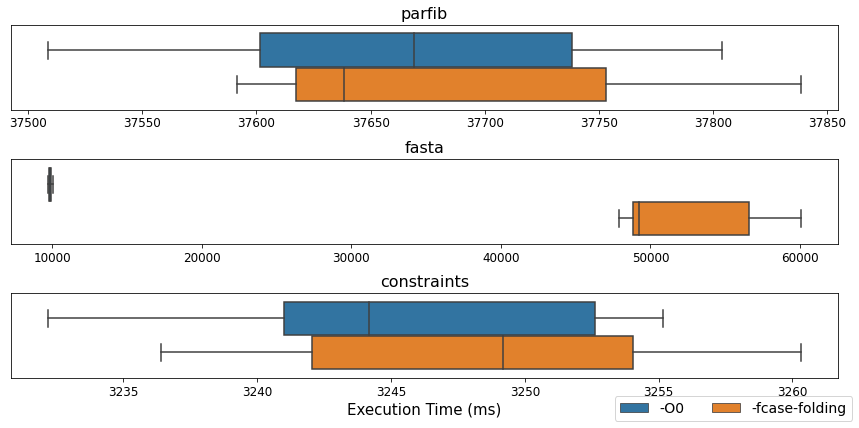

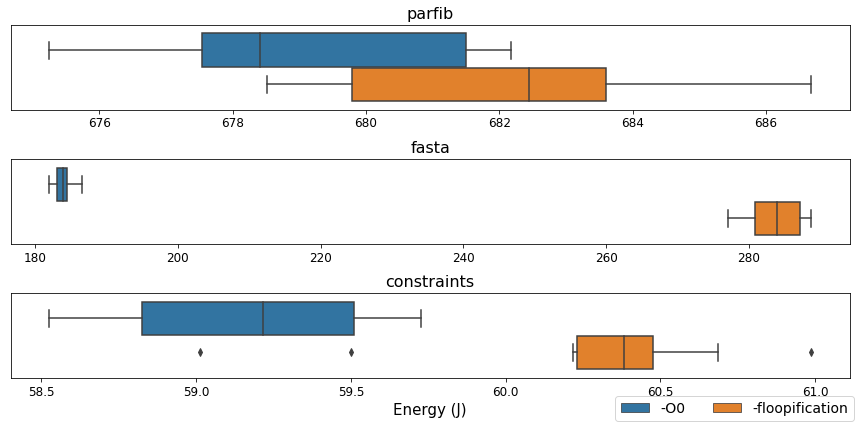

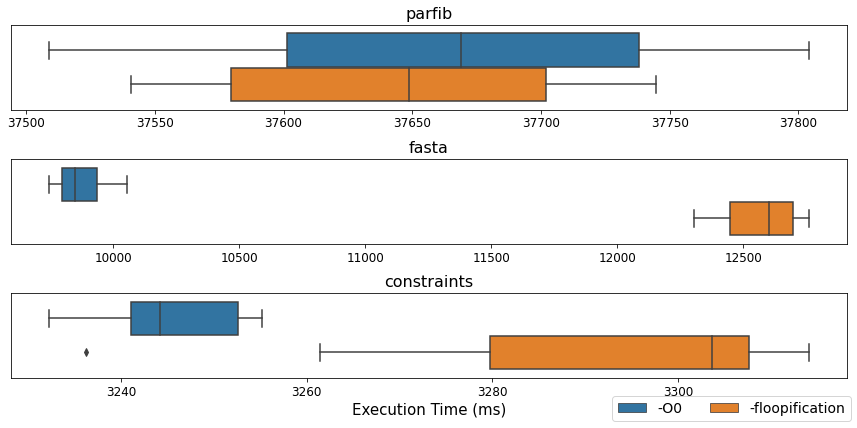

In [48]:
plot_col = int(np.ceil(np.sqrt(len(progs))))
fig_shape = (1, 3) # (columns, rows)


def create_subplot(axs, row, col, df, df_col, prog, label):
    ax = axs[row, col] if fig_shape[0] > 1 else axs[row]
    sns.boxplot(ax=ax, data=df, y='program', x=df_col, hue='flag')
    # ax.set(ylabel=prog, xlabel=label)
    ax.set(ylabel='', xlabel=label)
    ax.title.set_text(prog)
    ax.title.set_fontsize(16)
    ax.yaxis.set_ticks([])
    # map(lambda p: p.set_fontsize(14), ax.get_xticklabels())
    ax.xaxis.label.set_fontsize(15)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.get_legend().remove()

def format_fig(fig, label, path):
    lines_labels = [fig.axes[0].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.tight_layout()
    # fig.subplots_adjust(wspace=0.05)
    # fig.subplots_adjust(hspace=1)
    # fig.legend(lines, labels, loc=8, prop={'size': 12})
    fig.legend(lines, labels, loc=4,
        bbox_transform=fig.transFigure, ncol=3,
        prop={'size': 14})
    # fig.suptitle(label, fontsize=16, y=0.055, x=0.4)
    # fig.suptitle(label, fontsize=16, y=0, x=0.4)
    fig.savefig(path)


# c_flags = ['-floopification']
c_flags = ['-fcmm-sink','-fcase-folding','-floopification']
# c_progs = ['coins', 'callback001', 'k-nucleotide']
c_progs = ['parfib', 'fasta', 'constraints']

# for flag in flags:
for flag in c_flags:
    flag_df = df[(df['flag'] == flag) | (df['flag'] == '-O0')]

    # energy
    e_fig, e_axs = plt.subplots(fig_shape[1], fig_shape[0], figsize=[12,6])
    # execution time
    t_fig, t_axs = plt.subplots(fig_shape[1], fig_shape[0], figsize=[12,6])

    for i, prog in enumerate(c_progs):
        data = flag_df[flag_df['program'] == prog]
        row = i // fig_shape[0]
        col = i % fig_shape[0]

        e_xlabel, t_xlabel = ('', '')
        if row == fig_shape[1] - 1:
            e_xlabel = 'Energy (J)'
            t_xlabel = 'Execution Time (ms)'

        create_subplot(e_axs, row, col, data, 'pkg_energy', prog, e_xlabel)
        create_subplot(t_axs, row, col, data, 'execution_time', prog, t_xlabel)

    for i in range(len(progs), fig_shape[0] * fig_shape[1]):
        row = i // fig_shape[0]
        col = i % fig_shape[0]
        e_fig.delaxes(e_axs[row][col])
        t_fig.delaxes(t_axs[row][col])

    format_fig(e_fig, f'Energy consumption of programs compiled with {flag}', f'../../results/charts/random/energy-{flag[1:]}.png')
    format_fig(t_fig, f'Execution time of programs compiled with {flag}', f'../../results/charts/random/time-{flag[1:]}.png')